# MNIST Dataset

Correctly Touted as the <b>Hello World</b> of Machine Learning. Lets dive in straight and uncover the dataset

In [1]:
# Loading the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix  
from sklearn.metrics import precision_recall_curve , roc_curve , roc_auc_score

I have a habit of scrolling back up and adding the libraries in the first cell only, so you will see a lot of things being loaded.

## Step 1: Importing the Dataset

In [2]:
# importing the dataset

# The dataset for training is stored as 'train.csv' and the test dataset is stored in 'test.csv'. 
#Hence we will be taking it in the pandas dataframe

mnist_train = pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')

#Lets see the first 5 rows of the train dataset
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2 : Analysing the Data

In [3]:
mnist_train.shape #Checking the shape of the dataset

(42000, 785)

We can see there are 785 columns and the first column is our target variable named as label.

So we have 784 columns as features which are basically 784 pixels. So basically each of the image is actually a 28 * 28 pixel image.

So, lets do a few things first. Separate out the labels from train and test data. Also visualize any digit.

In [4]:
mnist_train_y = np.array(mnist_train['label']) #transforming the dataset into numpy array
mnist_train_X = np.array(mnist_train.drop('label' , axis = 1)) #transforming the labels into numpy array

mnist_test_x = np.array(mnist_test) #test set is also converted into numpy array

The label is 4


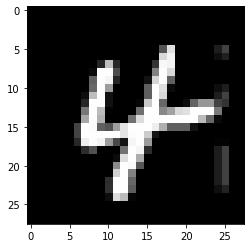

In [5]:
#Lets visualize one of the data

#We need to reshape it to 28 * 28 to visualize
np.random.seed(2)

any_index = np.random.randint(0 , 41999) #Picking a random index
pic_data = mnist_train_X[any_index].reshape(28,28)
plt.imshow(pic_data , cmap = 'gray')
print('The label is' , mnist_train_y[any_index])

Indeed! The picture is a 28 * 28 pixel image and it is labelled as 4.

It is always best to split out the development set before we move ahead.

Well, we are going to split the data in 80 - 20 format. So the training set will have 33600 data to train on and the development set will have 8400 data instances.

But even though the dataset is shuffled I love to shuffle it myself. 

In [6]:
# Setting up 33600 shuffled numbers

random_index = np.random.permutation(42000) #making random combination of 42000 numbers

#setting the train and dev index
train_index = random_index[:33600] 
dev_index = random_index[33600:]

train_X = mnist_train_X[train_index]
train_y = mnist_train_y[train_index]

dev_X = mnist_train_X[dev_index]
dev_y = mnist_train_y[dev_index]

In [7]:
print('Size of train data:' , len(train_X) , '\nSize of train label:', len(train_y) , 
      '\nSize of dev data:', len(dev_X) , '\nSize of dev data:' , len(dev_y)) #Checking the length

Size of train data: 33600 
Size of train label: 33600 
Size of dev data: 8400 
Size of dev data: 8400


Now that we have set aside the development set, lets move ahead with implemention.

## Step 3 : Training the Model

One very interesting thing about sklearn algorithms is that even if they support binary classification, under the hood they prepare that many models to train the data for multiclass models.

So, its better to get started with some models.

I have already given a thought and have formulated some of the models to try.

1. Stochastic Gradient Descent Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. K Nearest Neighbors Classifier

Its always better to get the best parameters by setting the GridSearchCV. 

Lets first set out for Decision Tree Classifier!

In [8]:
# Hyperparameters for Deccision Tree classifier
params2 = [{'criterion' : ['gini' , 'entropy'],
           'splitter' : ['best' , 'random']}]

grid_dt = GridSearchCV(DecisionTreeClassifier(),
                       params2,
                       cv = 5,
                       n_jobs = -1)

grid_dt.fit(train_X , train_y)

grid_dt.best_estimator_  #For checking the best estimator of this model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
#Defining and fiting the data to the model

dt = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

dt_pred = cross_val_predict(dt , train_X , train_y , cv = 5)

Next we are going to try out for SGD classifier

In [9]:
#Defining and fitting the model

sgd = SGDClassifier()

sgd_pred = cross_val_predict(sgd , train_X , train_y , cv = 5)

In [12]:
# Hyperparameters for Random Forest classifier

params2 = [{'criterion' : ['gini' , 'entropy' ]}]

grid2 = GridSearchCV(RandomForestClassifier(),
                     params2,
                     cv = 5,
                     n_jobs = -1)


grid2.fit(train_X , train_y)

grid2.best_estimator_    #For checking the best estimator of this model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Checking for Random Forest

In [10]:
#Defining and fitting the model

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_pred = cross_val_predict(rf , train_X , train_y , cv = 5)

Finally checking for K Nearest Neighbors

In [11]:
params3 = [{'metric' : ['minkowski' , 'euclidean'],
           'weights' : ['uniform' , 'distance']}]

grid3 = GridSearchCV(KNeighborsClassifier(),
                    params3,
                    cv = 5,
                    n_jobs = -1)

grid3.fit(train_X , train_y)

grid3.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [12]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

knn_pred = cross_val_predict(knn , train_X , train_y , cv = 5)

In [49]:
knn.fit(train_X , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

I have decided on validating the data based on f1 score.

So, lets do that

In [13]:
print("---The f1 scores are as following---")
print("Random Forest :" , f1_score(train_y , rf_pred , average = "weighted"))
print("SGD :" , f1_score(train_y , sgd_pred , average = "weighted"))
print("Decision Tree :" , f1_score(train_y , dt_pred , average = "weighted"))
print("K-Nearest Neighbors :" , f1_score(train_y , knn_pred , average = "weighted"))

---The f1 scores are as following---
Random Forest : 0.9338056345413486
SGD : 0.8739727746415975
Decision Tree : 0.854339194797068
K-Nearest Neighbors : 0.9644476173351296


We can see that KNN is giving us a great score.

Lets analyze the errors now using the confusion matrix.

Then we gonna check on cross val and test set.

In [25]:
conf_matrix = confusion_matrix(train_y , knn_pred) #generationg confusion matrix for our best predictor

np.fill_diagonal(conf_matrix , 0) #filling the diagonal with zero so that we can only get the errors

row_sum = conf_matrix.sum(axis = 1 , keepdims = True)

conf_matrix = conf_matrix / row_sum

conf_matrix

array([[0.        , 0.06896552, 0.06896552, 0.06896552, 0.03448276,
        0.13793103, 0.44827586, 0.06896552, 0.        , 0.10344828],
       [0.        , 0.        , 0.27272727, 0.09090909, 0.04545455,
        0.        , 0.22727273, 0.18181818, 0.04545455, 0.13636364],
       [0.13636364, 0.23295455, 0.        , 0.09659091, 0.01136364,
        0.01704545, 0.02840909, 0.40909091, 0.03409091, 0.03409091],
       [0.02439024, 0.05691057, 0.13821138, 0.        , 0.        ,
        0.30081301, 0.01626016, 0.18699187, 0.13821138, 0.13821138],
       [0.0137931 , 0.24827586, 0.        , 0.        , 0.        ,
        0.        , 0.08275862, 0.05517241, 0.        , 0.6       ],
       [0.04545455, 0.02272727, 0.01515152, 0.37878788, 0.01515152,
        0.        , 0.24242424, 0.02272727, 0.07575758, 0.18181818],
       [0.37209302, 0.13953488, 0.04651163, 0.        , 0.11627907,
        0.30232558, 0.        , 0.        , 0.02325581, 0.        ],
       [0.00877193, 0.39473684, 0.0789473

Text(33.0, 0.5, 'Actual')

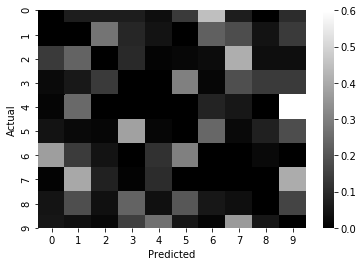

In [28]:
sns.heatmap(conf_matrix , cmap=plt.cm.gray) #plotting the heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual')

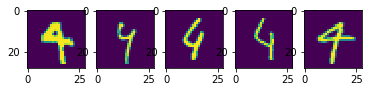

In [47]:
incorrect_4 = list(train_X[(knn_pred == 9) & (train_y == 4)])

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(incorrect_4[i].reshape(28 , 28))

Its understable why the digits were missed as 5.

Lets see how our cv and if there is any problem

In [50]:
knn_cv_pred = knn.predict(dev_X) #predicting values for dev set

f1_score(dev_y , knn_cv_pred , average = "weighted")

0.9705464652947329

Wow, that was nice to see. Our model performed better in the CV.

Its time to chec check our test set and see if we have done a good job in selecting our model.

In [52]:
final_pred = knn.predict(mnist_test_x) #getting the output of our final test set

Lets see how our model performed.

The predicted output is 1


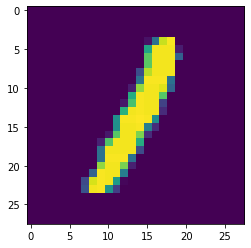

In [56]:
np.random.seed(2)

some_index = np.random.randint(0 , len(mnist_test_x))

print('The predicted output is' , final_pred[some_index])
plt.imshow(mnist_test_x[some_index].reshape(28,28))

Yay. Lets now convert the output predictions to the .csv file

In [67]:
output_value = pd.DataFrame(final_pred , columns = ['Label'])

output_value.index.name = 'ImageId'

output_value.index += 1

output_value

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [68]:
output_value.to_csv('Final_Submission.csv')